## Importing Libraries

In [1]:
from importlib import reload
import pandas as pd
import model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor
)
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
reload(ms)

<module 'model_selection' from 'e:\\Ames-Housing-Price-Predictor\\notebooks\\model_selection.py'>

## Load dataset

In [8]:
df = pd.read_parquet('../data/processed/06_feature_selection.parquet')

In [9]:
target = 'saleprice'
x = df.drop(columns=[target])
y = df[target]
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.1,
    random_state=17,
)

## Model Training

In [10]:
models = {
    'Bagging Regressor': BaggingRegressor(),
    'Random Forest': RandomForestRegressor(n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(verbose=0),
    'CatBoost': CatBoostRegressor(task_type='GPU', devices='0', verbose=0),
    'LightGBM': LGBMRegressor(device='gpu', n_jobs=-1, verbose=-1),
    "XGBoost": XGBRegressor(tree_method="hist", device="cuda")
}

In [12]:
reload(ms)
regression_metrics, predictions_dict, importances_dict = ms.model_predict(models, x_train, x_test, y_train, y_test)


✅ Testing Bagging Regressor...
MAE: 17749.20750853242 | MSE: 696415503.2012287 | RMSE: 26389.685545705706 | R²: 0.8995913761232502 | RMSLE: 0.14440007196038293 | MAPE: 0.10557104485076334
--------------------------------------------------

✅ Testing Random Forest...
MAE: 16362.444539249147 | MSE: 588476625.0962583 | RMSE: 24258.537159034513 | R²: 0.9151539162497998 | RMSLE: 0.13146412172046182 | MAPE: 0.09586036212540176
--------------------------------------------------

✅ Testing Gradient Boosting...
MAE: 15490.582384141608 | MSE: 508357070.3223708 | RMSE: 22546.775164585528 | R²: 0.9267054888432942 | RMSLE: 0.12159908284797373 | MAPE: 0.08882958509214296
--------------------------------------------------

✅ Testing CatBoost...
MAE: 14203.2981023109 | MSE: 421495624.2257893 | RMSE: 20530.35859954203 | R²: 0.9392291018737499 | RMSLE: 0.11766550337639757 | MAPE: 0.0846688793013022
--------------------------------------------------

✅ Testing LightGBM...
MAE: 14661.899054367947 | MSE: 

## Model Evaluation

### Regression Metrics

In [13]:
regression_metrics

,Model,MAE,MSE,RMSE,R²,RMSLE,MAPE
0,Bagging Regressor,17749.207509,6.964155e+08,26389.685546,0.899591,0.144400,0.105571
1,Random Forest,16362.444539,5.884766e+08,24258.537159,0.915154,0.131464,0.095860
2,Gradient Boosting,15490.582384,5.083571e+08,22546.775165,0.926705,0.121599,0.088830
3,CatBoost,14203.298102,4.214956e+08,20530.358600,0.939229,0.117666,0.084669
4,LightGBM,14661.899054,4.933595e+08,22211.697221,0.928868,0.118644,0.084059
5,XGBoost,16323.815193,6.004005e+08,24503.071391,0.913435,0.129196,0.093617


### Feature Importances

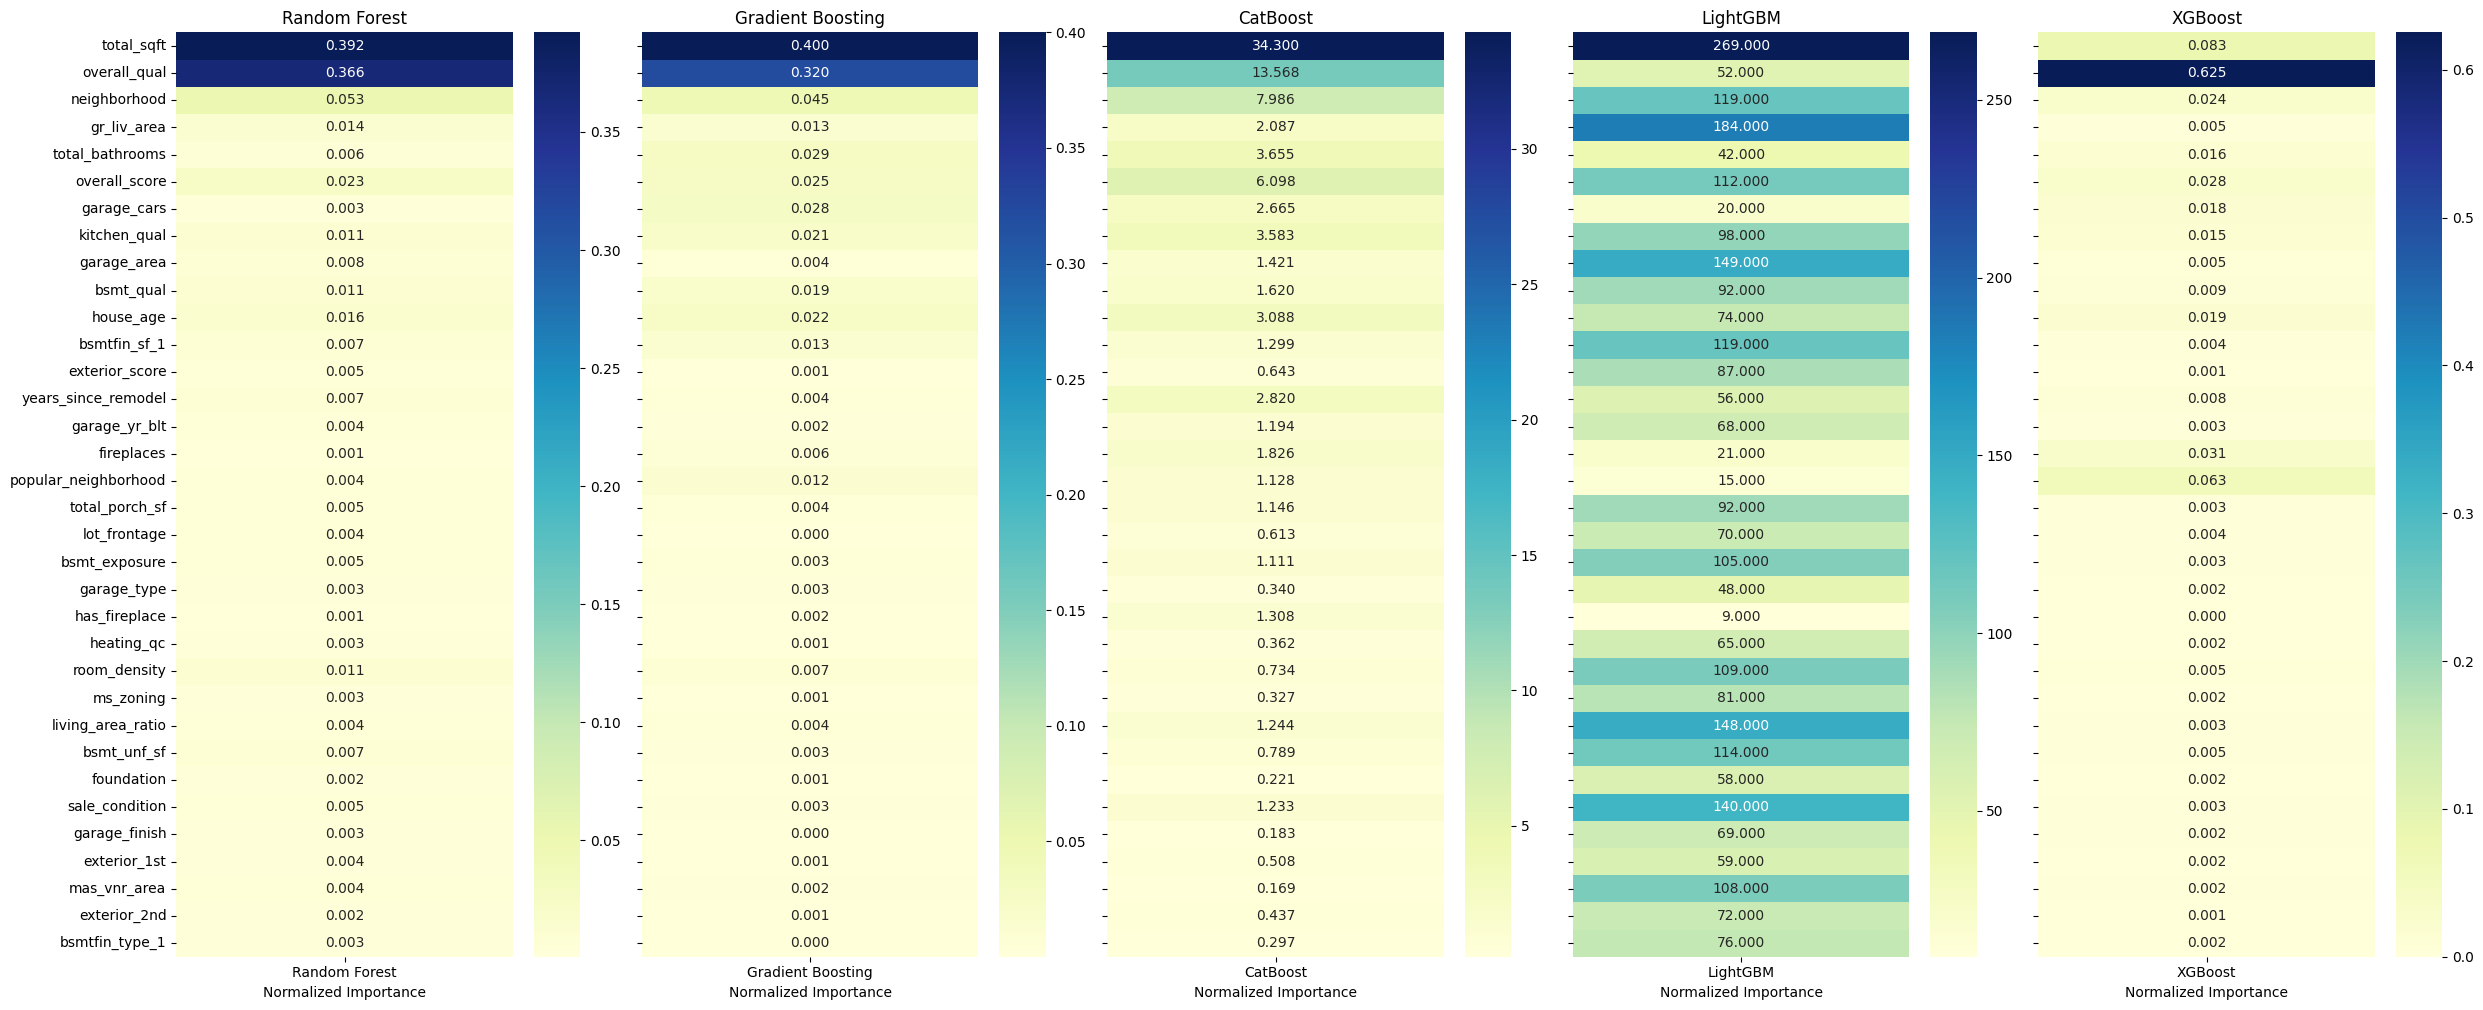

In [14]:
ms.plot_feature_importances(df.drop(columns=target).columns, importances_dict)

### Residuals Plot

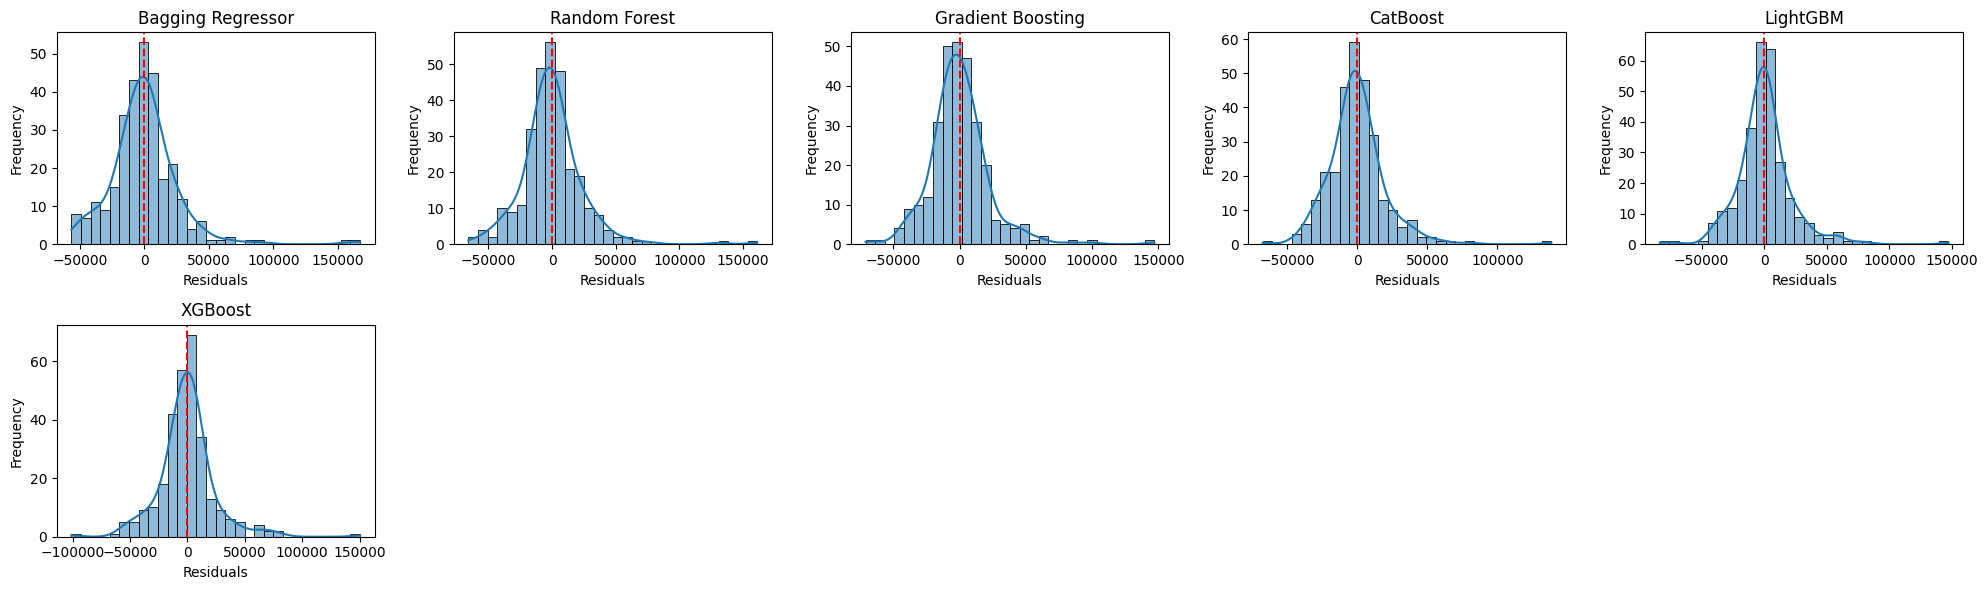

In [15]:
reload(ms)
ms.plot_residuals(y_test, predictions_dict, n_cols=5)

### Scatter Plot

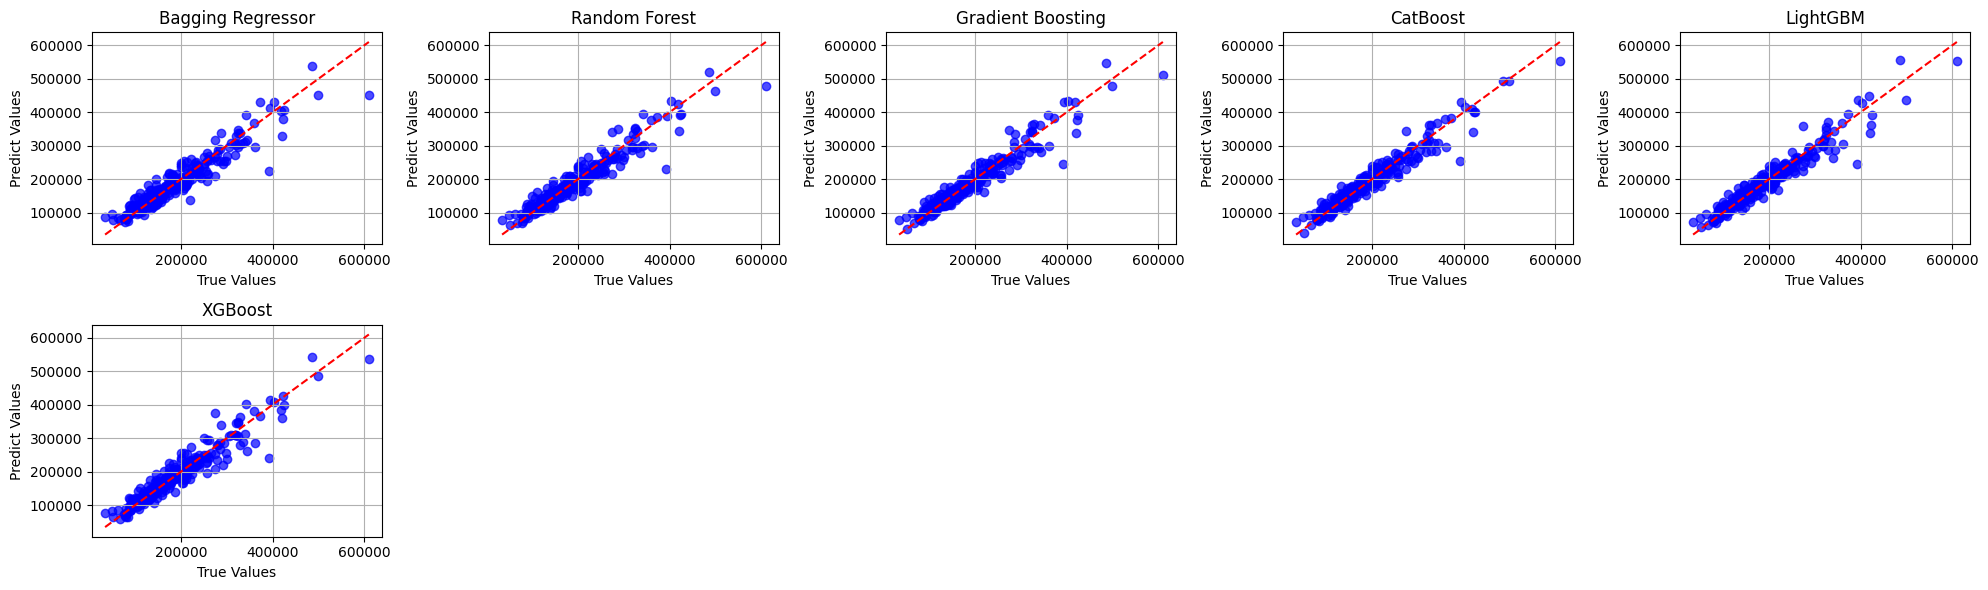

In [16]:
reload(ms)
ms.scatter_plot(y_test, predictions_dict, n_cols=5)

### Learning Curve

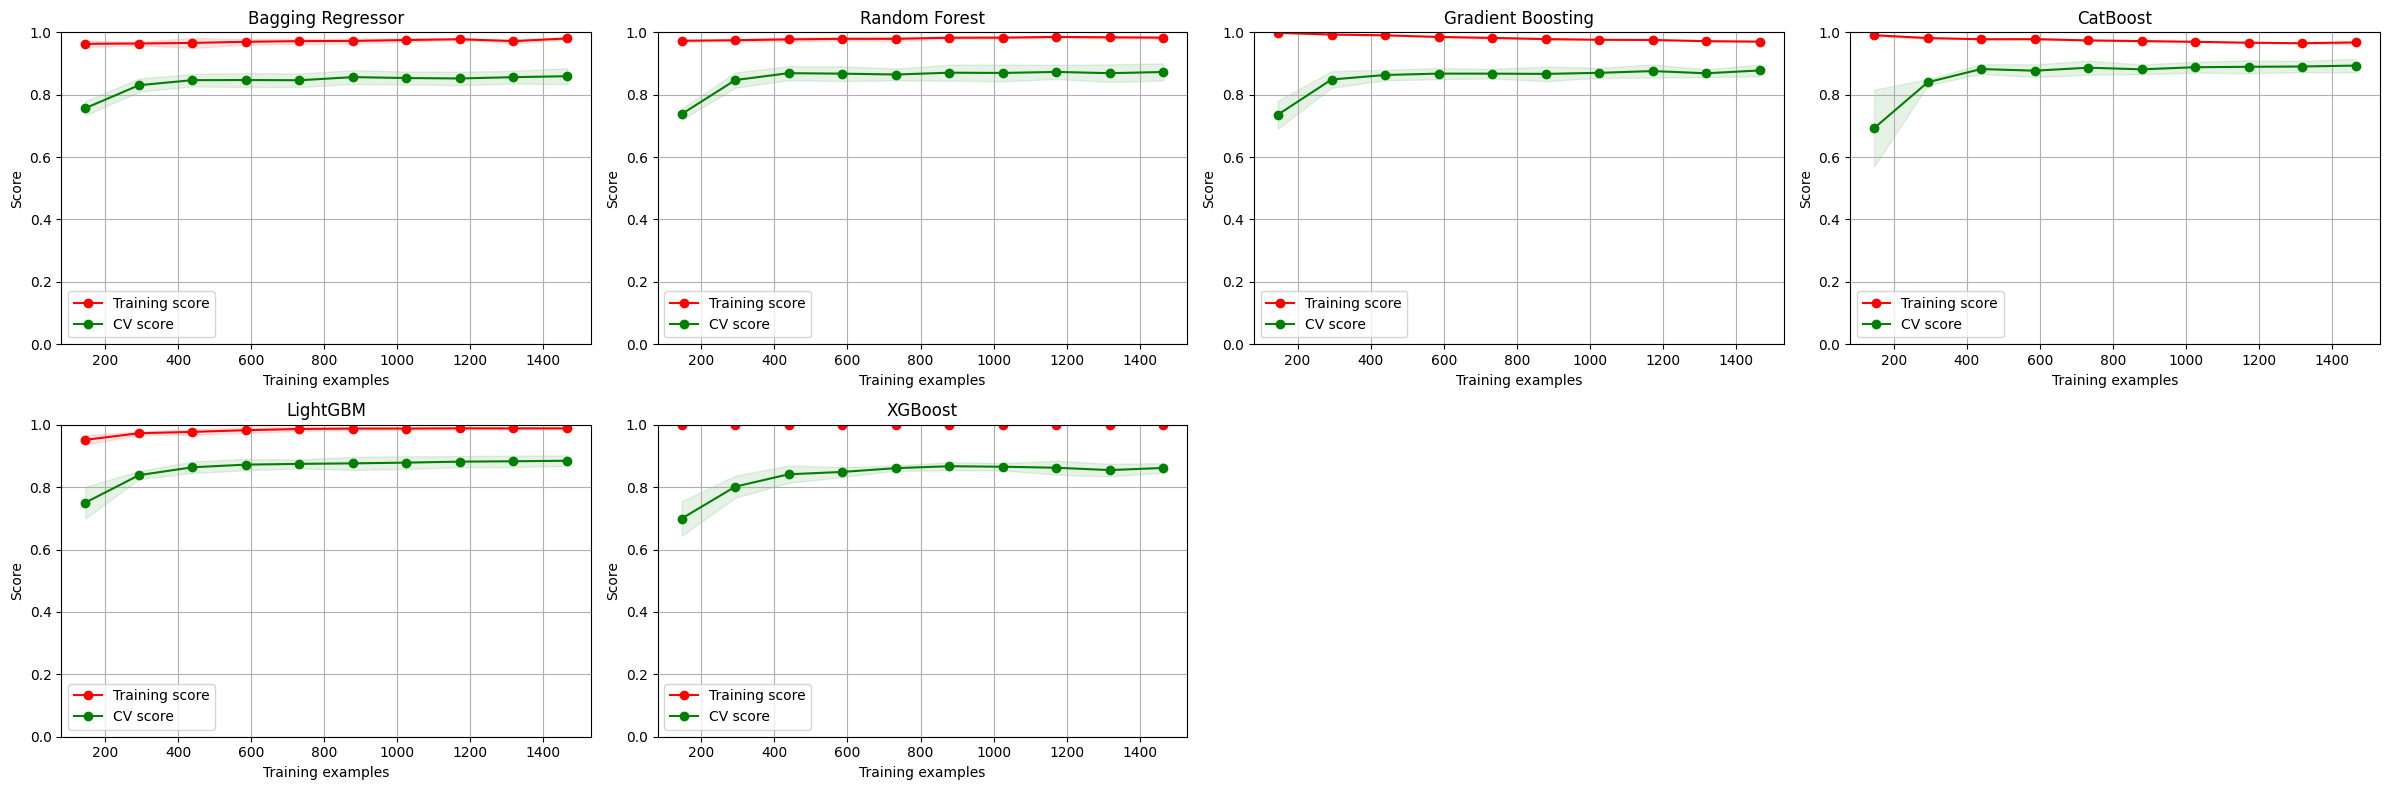

In [17]:
reload(ms)
learning_curve_summary = ms.learning_curves_regression(models, x, y, cv=2, scoring='r2', cols=4)

### Learning Curve Summary

In [19]:
learning_curve_summary

,Model,Train score,CV score,Gap,Best n_samples
0,Bagging Regressor,0.980415,0.859368,0.121048,1465
1,Random Forest,0.982966,0.872843,0.110123,1172
2,Gradient Boosting,0.970162,0.877751,0.092411,1465
3,CatBoost,0.967580,0.893365,0.074215,1465
4,LightGBM,0.988717,0.884808,0.103909,1465
5,XGBoost,0.999913,0.861827,0.138086,879


### Best Model

In [20]:
models['CatBoost'].save_model("../models/catboost_model.cbm")